In [1]:
# Algorithmic Trading  SMA_Method

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
'''
Iran.Kh..Inv..csv
Iran.Khodro.csv
Jahrom.Power.Plant.csv
'''

raw = pd.read_csv('Jahrom.Power.Plant.csv',index_col=1, parse_dates=True)

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2021-08-04 to 2019-09-25
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   441 non-null    object 
 1   <FIRST>    441 non-null    float64
 2   <HIGH>     441 non-null    float64
 3   <LOW>      441 non-null    float64
 4   <CLOSE>    441 non-null    float64
 5   <VALUE>    441 non-null    int64  
 6   <VOL>      441 non-null    int64  
 7   <OPENINT>  441 non-null    int64  
 8   <PER>      441 non-null    object 
 9   <OPEN>     441 non-null    float64
 10  <LAST>     441 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 37.9+ KB


In [5]:
symbol = '<CLOSE>'
data = (pd.DataFrame(raw[symbol]).dropna())
#data = data[:365]
#print(data)

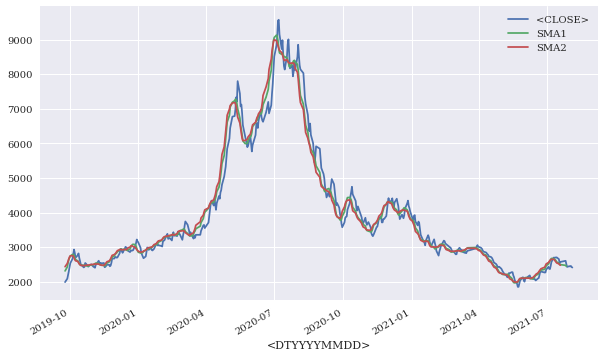

In [6]:
SMA1 = 7
SMA2 = 9
#SMA3 = 205
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()
#data['SMA3'] = data[symbol].rolling(SMA3).mean()
data.plot(figsize=(10, 6));

In [7]:
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], -1, 1)
data.tail()

,<CLOSE>,SMA1,SMA2,Position
<DTYYYYMMDD>,,,,
2019-10-01,2417.0,2695.857143,2717.666667,1
2019-09-30,2302.0,2640.000000,2660.111111,1
2019-09-29,2193.0,2548.428571,2596.222222,1
2019-09-28,2089.0,2428.142857,2529.111111,1
2019-09-25,1990.0,2313.000000,2435.333333,1


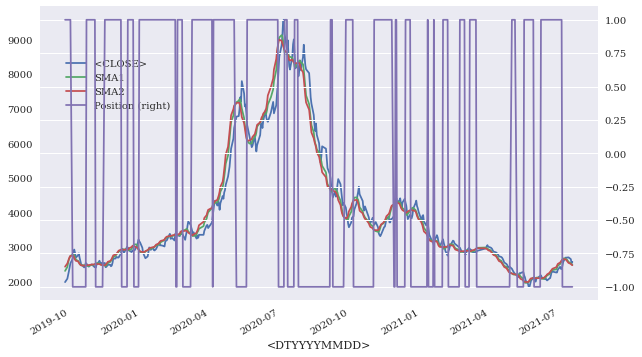

In [8]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [9]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.round(4).head()

,<CLOSE>,SMA1,SMA2,Position,Returns,Strategy
<DTYYYYMMDD>,,,,,,
2021-07-19,2574.0,2495.2857,2478.3333,-1,NaN,NaN
2021-07-18,2535.0,2506.4286,2492.0000,-1,-0.0153,0.0153
2021-07-17,2654.0,2536.5714,2517.3333,-1,0.0459,-0.0459
2021-07-14,2706.0,2573.0000,2545.0000,-1,0.0194,-0.0194
2021-07-13,2699.0,2611.5714,2573.4444,-1,-0.0026,0.0026


In [10]:
data.dropna(inplace=True)
np.exp(data[['Returns', 'Strategy']].sum())

Returns     0.773116
Strategy    0.848167
dtype: float64

In [11]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.509948
Strategy    0.510000
dtype: float64

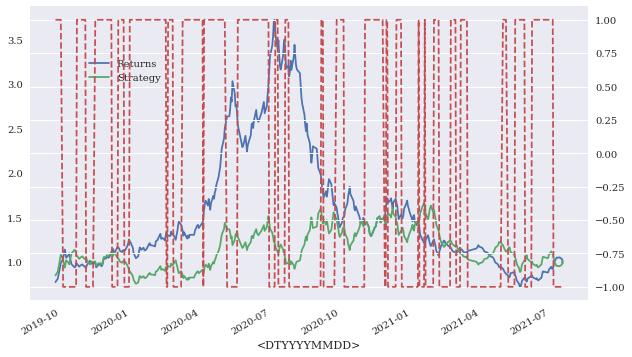

In [12]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [13]:
#data.where((data['Position'][i]+(data['Position'][i+1]) == 0))
for i in range(159):
    if data['Position'][i]/data['Position'][i+1] <0:
        print(data.index[i])

#data['Position']

2021-07-06 00:00:00
2021-06-08 00:00:00
2021-05-30 00:00:00
2021-05-17 00:00:00
2021-05-08 00:00:00
2021-05-01 00:00:00
2021-03-16 00:00:00
2021-03-07 00:00:00
2021-03-01 00:00:00
2021-02-22 00:00:00
2021-02-07 00:00:00
2021-01-31 00:00:00
2021-01-20 00:00:00
2021-01-19 00:00:00
2021-01-12 00:00:00
2021-01-11 00:00:00
2020-12-20 00:00:00
2020-12-13 00:00:00
2020-12-02 00:00:00
2020-11-30 00:00:00
2020-11-28 00:00:00


In [14]:
from itertools import product
sma1 = range(1, 253)
sma2 = range(1, 253)
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(raw[symbol])
    #data = data[:252]
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], -1, 1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
      {'SMA1': SMA1, 'SMA2': SMA2,
       'MARKET': perf['Returns'],
       'STRATEGY': perf['Strategy'],
       'OUT': perf['Strategy'] - perf['Returns']},
       index=[0]), ignore_index=True)

In [16]:
results.info()
results.sort_values('OUT', ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63504 entries, 0 to 63503
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      63504 non-null  int64  
 1   SMA2      63504 non-null  int64  
 2   MARKET    63504 non-null  float64
 3   STRATEGY  63504 non-null  float64
 4   OUT       63504 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.4 MB


,SMA1,SMA2,MARKET,STRATEGY,OUT
252,2,1,0.820280,69.678119,68.857839
504,3,1,0.809931,24.060014,23.250083
1008,5,1,0.811914,21.936281,21.124368
756,4,1,0.814572,20.955933,20.141361
1260,6,1,0.819267,12.937771,12.118504
18426,74,31,0.710968,11.561833,10.850865
2268,10,1,0.785010,11.029869,10.244859
21953,88,30,0.704176,10.818423,10.114248
22456,90,29,0.701445,10.776477,10.075031
22204,89,29,0.696291,10.697293,10.001002
